In [77]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [78]:
msft = yf.Ticker("MSFT")
msft_df = msft.history(start="2010-01-01", end="2025-07-22", interval="1d")
msft_df = msft_df.drop(columns=["Dividends", "Stock Splits"])
msft_df = msft_df[msft_df.index >= "2016-01-01"]
msft_df.to_csv("data/stocks/MSFT.csv")
msft_df.index = msft_df.index.tz_localize(None)

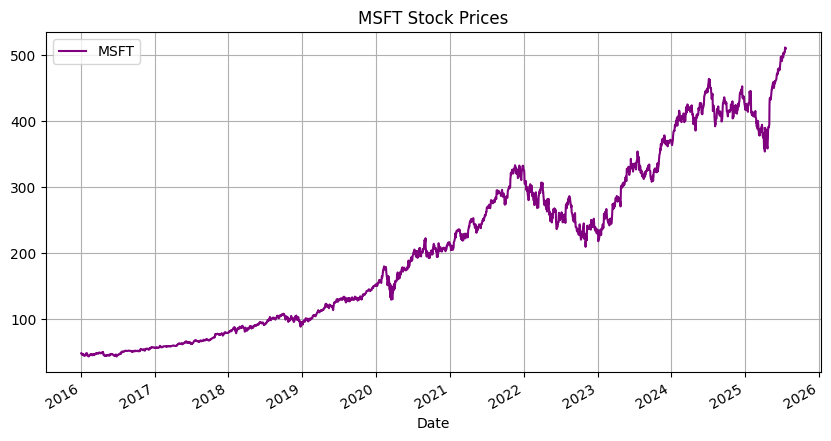

In [79]:
plt.subplots(figsize=(10, 5))
msft_df['Close'].plot(label='MSFT', color='purple')
plt.title('MSFT Stock Prices')
plt.grid()
plt.legend()

<Axes: xlabel='Date'>

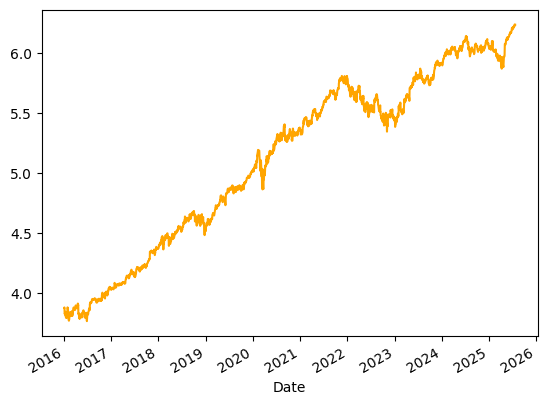

In [80]:
# log data plot
np.log(msft_df['Close']).plot(label='Log Returns', color='orange')

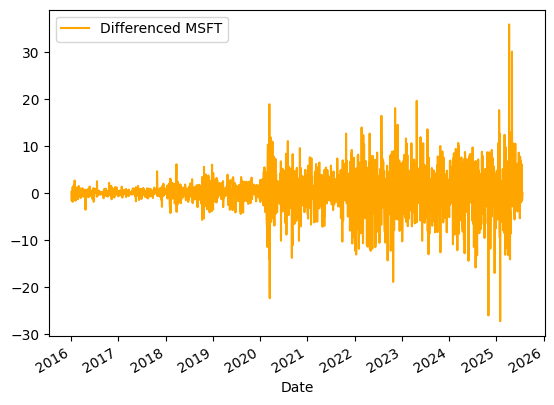

In [81]:
# checking differenced data stationarity; we still need to improve
differentiated_y = msft_df['Close'].diff().dropna().plot(label='Differenced MSFT', color='orange')
plt.legend()

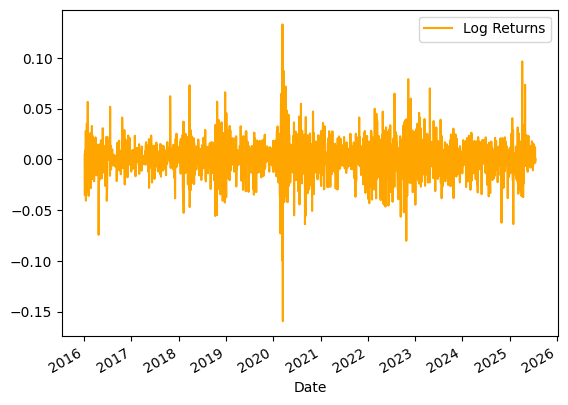

In [82]:
# Check differenced log data stationarity
np.log(msft_df['Close']).diff().dropna().plot(label='Log Returns', color='orange')
plt.legend()

# 1. Split the data for train-test

In [83]:
split_date = '2022-07-02'
train =np.log(msft_df.loc[:pd.Timestamp(split_date) - pd.Timedelta(days=1), 'Close'])
test  = np.log(msft_df.loc[split_date:, 'Close'])

# 2. PACF and ACF analysis

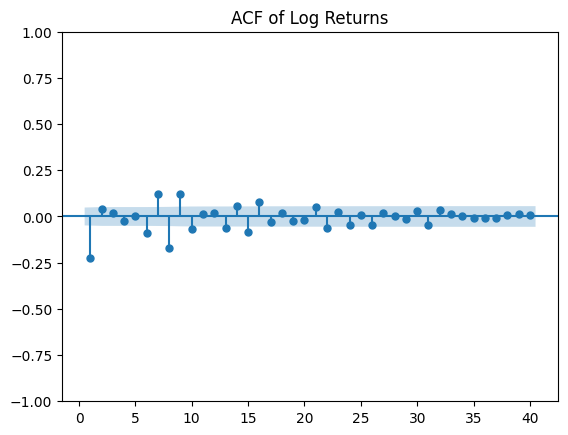

In [84]:
acf_original = plot_acf(train.diff().dropna(), lags=40, title='ACF of Log Returns', zero=False)

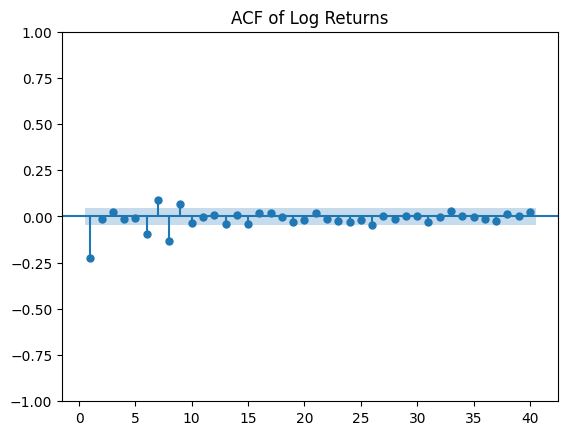

In [85]:
pacf_original = plot_pacf(train.diff().dropna(), lags=40, title='ACF of Log Returns', zero=False)

In [86]:
adf_test = adfuller(train.diff().dropna())
print(f'ADF p-value: {adf_test[1]}')

ADF p-value: 8.793253361621416e-27


In [87]:
model = ARIMA(train, order=(9,1,9), trend='t')
res   = model.fit()

/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/

In [88]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1636
Model:                 ARIMA(9, 1, 9)   Log Likelihood                4387.976
Date:                Tue, 22 Jul 2025   AIC                          -8735.952
Time:                        23:29:05   BIC                          -8627.964
Sample:                             0   HQIC                         -8695.896
                               - 1636                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0010      0.000      3.040      0.002       0.000       0.002
ar.L1         -0.0773      2.168     -0.036      0.972      -4.327       4.172
ar.L2          0.0214      2.064      0.010      0.992      -4.025       4.067
ar.L3         -0.0052      1.101     -0.005      0.996      -2.163       2.152
ar.L4         -0.0232      0.627     -0.037      0.970      -1.252       1.206
ar.L5          0.0455      0.646      0.070      0.944      -1.221       1.312
ar.L6         -0.0875      0.526     -0.166      0.868      -1.119       0.944
ar.L7          0.1350      0.415      0.326      0.745      -0.678       0.948
ar.L8         -0.1357      0.595     -0.228      0.820      -1.302       1.031
ar.L9          0.1871      0.490      0.382      0.702      -0.773       1.147
ma.L1         -0.1139      2.169     -0.052      0.958      -4.366       4.138
ma.L2         -0.0295      1.794     -0.016      0.987      -3.545       3.486
ma.L3          0.0395      0.895      0.044      0.965      -1.716       1.795
ma.L4         -0.0025      0.638     -0.004      0.997      -1.254       1.249
ma.L5         -0.0847      0.604     -0.140      0.888      -1.269       1.099
ma.L6          0.0356      0.472      0.076      0.940      -0.889       0.961
ma.L7         -0.0796      0.398     -0.200      0.842      -0.860       0.701
ma.L8          0.0285      0.518      0.055      0.956      -0.986       1.043
ma.L9         -0.1189      0.396     -0.300      0.764      -0.895       0.657
sigma2         0.0003   6.17e-06     44.264      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2067.78
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

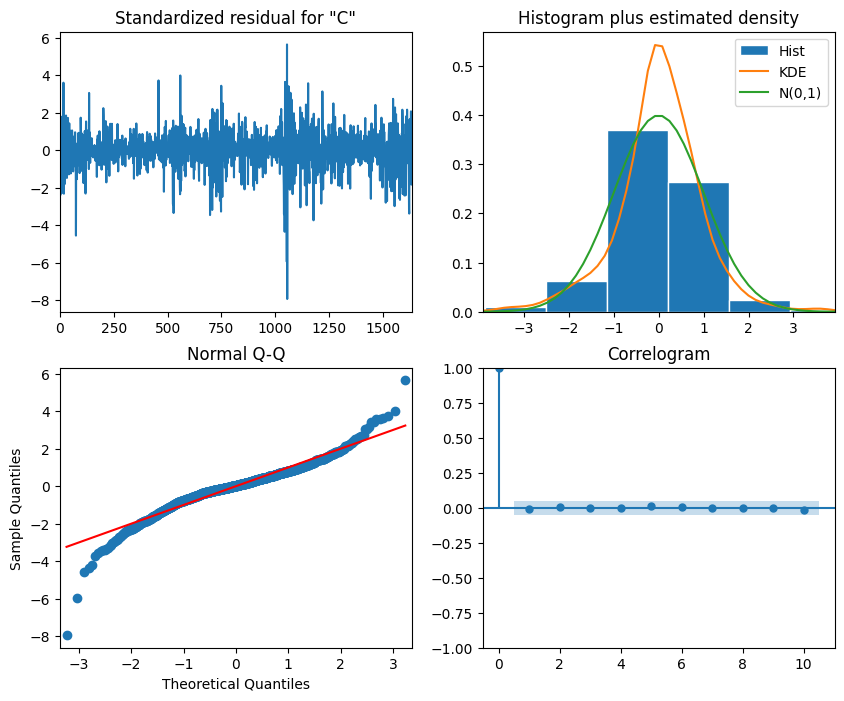

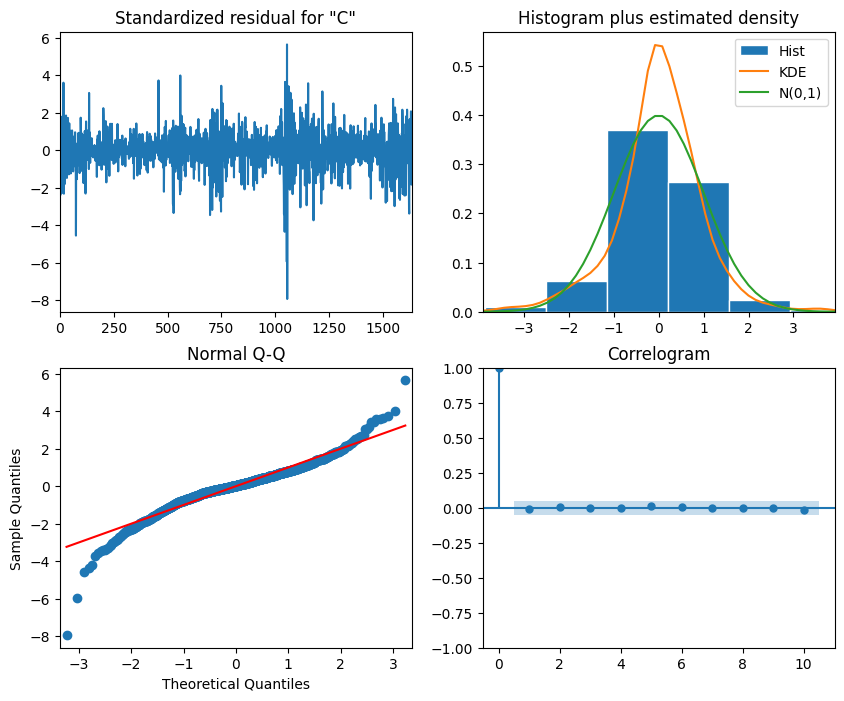

In [89]:
res.plot_diagnostics(figsize=(10, 8))

In [90]:
n_steps = len(test)
forecast_res = res.get_forecast(steps=n_steps)
fc_mean = forecast_res.predicted_mean
fc_ci   = forecast_res.conf_int()

/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/diegolarraguibel/Desktop/Proyectos/Financial-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


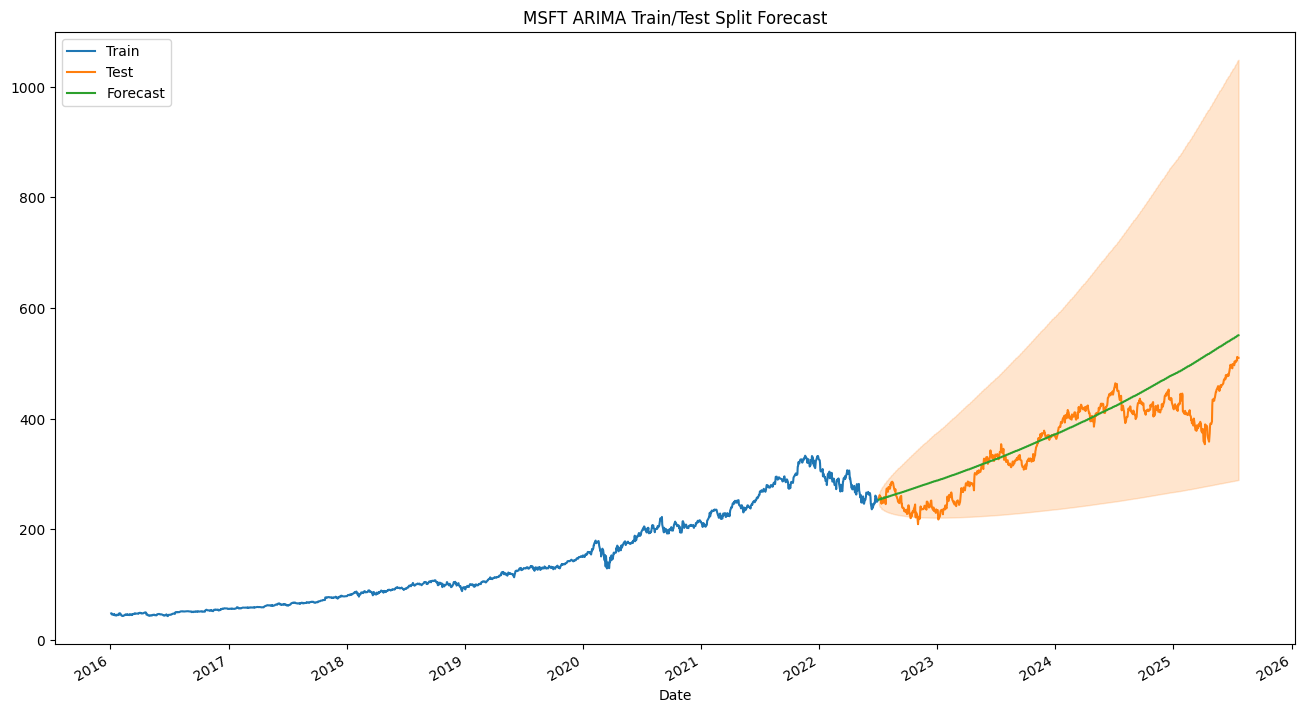

In [91]:
# 4. Plot train, test and forecast
ax = np.exp(train).plot(label='Train', figsize=(16,9))
np.exp(test).plot(ax=ax, label='Test', color='C1')
fc_mean.index = test.index 
fc_ci.index   = test.index
np.exp(fc_mean).plot(ax=ax, label='Forecast', color='C2')
ax.fill_between(test.index, np.exp(fc_ci).iloc[:,0], np.exp(fc_ci).iloc[:,1], color='C1', alpha=0.2)
ax.legend()
plt.title("MSFT ARIMA Train/Test Split Forecast")
plt.show()